In [6]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from scipy import linalg

In [7]:
import pchem.calorimetry as cal

In [8]:
cal.__file__

'/Users/dwyerry/programming/pchem/pchem/calorimetry.py'

In [4]:
H2O = cal.Substance2("H2O(l)", state='l', H0=-285.826e3, S0=69.96,
                        cP=4.18*18.02, molarMass=18.02, density=1.0,
                        atoms=dict(H=2,O=1, c=0))
Hplus = cal.Substance2("H+(aq)", state="aq", H0=0, S0=0, cP=0,
                       molarMass=1.01, density=0,
                      atoms=dict(H=1,c=1))
OH = cal.Substance2("OH-(aq)", state="aq", H0=-230.02e3, S0=-10.9, molarMass=17.01,
                   cP=-148.5, density=0, atoms=dict(H=1,O=1,c=-1))

HF = cal.Substance2('HF(aq)', state="aq", H0=-324.93e3, S0=-13.8, molarMass=18.998+1.01,cP=0,
                    density=0, atoms=dict(H=1,F=1))
F = cal.Substance2('F-(aq)', state="aq", H0=-335.35e3, S0=-13.8, molarMass=18.998,cP=-106.7,
                   density=0, atoms=dict(F=1,c=-1))


dH_ice = -6.01e3
T_ice  = 273.15

ice = cal.phaseChange(dH_ice, T_ice, H2O, cP=2.108*H2O.molarMass,
                    name="ice", state='s', density=0.91, atoms=dict(H=2,O=1))


chemicals = {0: H2O, 1: Hplus, 2: OH}

rxns = [{0: -1, 1: 1, 2: 1}]

s0 = cal.State3(T=298.15, chemicals=chemicals, rxns=[], V=1.0)

n0 = 1000/18.02

s0.set_state({0: 1000/18.02, 1:0, 2: 0})

In [5]:
s0._solve_iterative()

(array([ 9.99613487e-08,  9.99613486e-08,  5.54938956e+01, -4.39246161e+01,
        -3.58653750e+01,  2.78061339e+01]),
 [6.907372299553355, 3.6096492301851413e-06, 2.879012583889562e-10])

In [11]:
s0.fi(np.array([1.0, 0.01, 0.01, 0,0,0]))

array([ 2.85423813e-01,  3.50085409e-14,  5.57476758e+01, -4.14471658e+01,
       -4.08202757e+01,  4.01933856e+01])

In [12]:
s0.fi

<bound method State3.fi of State3(T=298.15, chemicals={0: Substance2(name='H2O(l)', H0=-285826.0, S0=69.96, cP=75.3236, molarMass=18.02, state='l', density=1.0, atoms={'H': 2, 'O': 1, 'c': 0}, T0=298.15, conc0=1), 1: Substance2(name='H+(aq)', H0=0, S0=0, cP=0, molarMass=1.01, state='aq', density=0, atoms={'H': 1, 'c': 1}, T0=298.15, conc0=1), 2: Substance2(name='OH-(aq)', H0=-230020.0, S0=-10.9, cP=-148.5, molarMass=17.01, state='aq', density=0, atoms={'H': 1, 'O': 1, 'c': -1}, T0=298.15, conc0=1)}, rxns=[], V=1.0, x=array([ 0.        ,  0.        , 55.49389567]), x_keys=array([1, 2, 0]))>

In [117]:
def f2(x):
    RT = 8.3145*298.15
    V=1
    return np.array([np.log(x[0]/V)-x[2]*2, np.log(x[1]/V)+5000/RT-x[2], 2-x[0]*2-x[1]])

In [118]:
xf2 = np.array([0.99, 0.02, 0])
f2(xf2)

array([-1.00503359e-02, -1.89505480e+00,  1.73472348e-17])

In [129]:
A2 = np.array([[2, 1]])

In [119]:
def f2it(x):
    RT = 8.3145*298.15
    V=1
    A = np.array([[1, 0, -2], [0, 1, -1], [2*x[0], x[1], 0]])
    b = np.array([-np.log(x[0]/V), -np.log(x[1]/V)-3000/RT, 2-x[0]*2-x[1]])
    return linalg.solve(A, b)

In [120]:
out = f2it(xf2)
val = np.log(xf2[:2]) + out[:2]
xf3 = np.r_[np.exp(val), out[2:]]

In [121]:
f2(xf3)

array([-4.16333634e-17,  8.06787284e-01, -2.19711285e-01])

In [122]:
def iteration(x0):
    print(f2(x0))
    out = f2it(x0)
    val = np.log(x0[:2]) + out[:2]
    res = np.r_[np.exp(val), out[2:]]
    print(res)
    return res

In [123]:
xf3

array([ 0.96352772,  0.29265585, -0.01857701])

In [124]:
out = f2it(xf)
val = np.log(xf3[:2]) + out[:2]
xf4 = np.r_[np.exp(val), out[2:]]

NameError: name 'xf' is not defined

In [125]:
x

NameError: name 'x' is not defined

In [126]:
xf2 = np.array([0.99, 0.02, 0.0])
xs = [xf2]
for i in range(3):
    xf2 = iteration(xf2)
    xs.append(xf2)

[-1.00503359e-02 -1.89505480e+00  1.73472348e-17]
[ 0.96352772  0.29265585 -0.01857701]
[-4.16333634e-17  8.06787284e-01 -2.19711285e-01]
[ 0.86664873  0.27755347 -0.07156077]
[ 2.77555756e-17  8.06787284e-01 -1.08509261e-02]
[ 0.86163999  0.27675025 -0.07445887]


In [94]:
K = np.exp(-5000*2/(8.3145*298.15))

In [95]:
0.13**2 / 0.936

0.018055555555555557

In [96]:
K

0.017704500292228767

In [31]:
f2(xf4)

array([-3.38514111e+03,  3.30944641e+03, -2.30609809e+00])

In [4]:
H2O = cal.Substance2("H2O(l)", state='l', H0=-285.826e3, S0=69.96,
                        cP=4.18*18.02, molarMass=18.02, density=1.0,
                        atoms=dict(H=2,O=1, c=0))
Hplus = cal.Substance2("H+(aq)", state="aq", H0=0, S0=0, cP=0,
                       molarMass=1.01, density=0,
                      atoms=dict(H=1,c=1))
OH = cal.Substance2("OH-(aq)", state="aq", H0=-230.02e3, S0=-10.9, molarMass=17.01,
                   cP=-148.5, density=0, atoms=dict(H=1,O=1,c=-1))

HF = cal.Substance2('HF(aq)', state="aq", H0=-324.93e3, S0=-13.8, molarMass=18.998+1.01,cP=0,
                    density=0, atoms=dict(H=1,F=1))
F = cal.Substance2('F-(aq)', state="aq", H0=-335.35e3, S0=-13.8, molarMass=18.998,cP=-106.7,
                   density=0, atoms=dict(F=1,c=-1))


dH_ice = -6.01e3
T_ice  = 273.15

ice = cal.phaseChange(dH_ice, T_ice, H2O, cP=2.108*H2O.molarMass,
                    name="ice", state='s', density=0.91, atoms=dict(H=2,O=1))


chemicals = {0: H2O, 1: Hplus, 2: OH, 10: HF, 11: F}

rxns = [{0: -1, 1: 1, 2: 1}]

s0 = cal.State3(T=298.15, chemicals=chemicals, rxns=[], V=1.0)

n0 = 1000/18.02

s0.set_state({0: 1000/18.02, 1: 1, 2: 0, 10:0, 11:1})

In [5]:
s0.all_atoms

('F', 'H', 'O', 'c')

In [13]:
[x.state for x in s0.chem_vals]

['l', 'aq', 'aq', 'aq', 'aq']

In [6]:
s0.A

array([[ 0.,  0.,  0.,  1.,  1.],
       [ 2.,  1.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  0.,  0.],
       [ 0.,  1., -1.,  0., -1.]])

In [9]:
s0.A

array([[ 0.,  0.,  0.,  1.,  1.],
       [ 2.,  1.,  1.,  1.,  0.],
       [ 1.,  0.,  1.,  0.,  0.],
       [ 0.,  1., -1.,  0., -1.]])

In [15]:
x0 = np.zeros(s0.N_chem+s0.N_atoms)
x0[:s0.N_chem] = s0.x # Current state

In [17]:
df = s0.f(x0)

In [22]:
s0.A.T@y

array([0., 2., 1., 0.])

In [18]:
df[0]

array([-123.71460719,    0.        , -160.5551955 , -198.49249778,
       -133.61830674,    0.        ,    0.        ,    0.        ,
          0.        ])

In [28]:
n_aq = x0[:s0.N_chem][1:]

In [29]:
s0.A.T[1:] @ np.diag(n_aq) @ r

array([[ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0., -1.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -1.]])

In [26]:
self=s0
all_atoms = set()
for x in self.chem_vals:
    all_atoms.update(x.atoms.keys())

N_atoms = len(all_atoms)
N_chem = len(self.chem_vals)
all_atoms = sorted(all_atoms)
A = np.zeros(shape=(N_atoms, N_chem))
for i, atom in enumerate(all_atoms):
    for j, chem in enumerate(self.chem_vals):
        A[i, j] = chem.atoms.get(atom, 0)

In [27]:
A@s0.x

array([  1.        , 111.98779134,  55.49389567,   0.        ])

In [28]:
all_atoms

['F', 'H', 'O', 'c']

In [29]:
s0._solve_constT()

(array([ 5.58934028e+01,  1.22776560e-03,  8.36384461e-12,  1.28414981e-06,
         8.11327411e-02, -9.90055471e+08,  9.90055613e+08, -1.98011110e+09,
        -9.90055607e+08]),
 {'nfev': 263,
  'fjac': array([[ 3.12673868e-22,  1.32348898e-23,  9.26442286e-23,
          -1.58818678e-22, -3.49566527e-21, -2.01948392e-28,
           8.94427191e-01,  4.47213595e-01,  1.51461294e-27],
         [ 1.39048929e-17, -9.99999441e-01, -3.33066907e-16,
           1.66533454e-16,  0.00000000e+00, -3.44107135e-22,
           1.93214297e-04, -3.86428594e-04,  9.65524798e-04],
         [ 1.66509737e-16,  1.43516922e-16, -1.00000000e+00,
          -1.11022302e-16,  1.87350135e-16,  1.21760986e-21,
          -8.13151629e-20,  2.16840434e-19, -4.33680869e-19],
         [ 1.15366037e-12,  1.84263298e-10,  2.38161926e-16,
          -1.00000000e+00, -3.20854454e-14,  9.83476639e-07,
           1.90734828e-07, -3.81469655e-07, -1.78106445e-13],
         [-3.25260652e-19, -7.29292328e-05,  1.53179335e-16,
 

In [57]:
nH = nOH= 1e-7
Gbar_opt = s0.get_prop_conc('Gbar', np.array([n0-nH, nH, nOH]))

Gbar_opt_dim = Gbar_opt/(8.3145*298.15)

In [68]:
out = linalg.lstsq(A.T, Gbar_opt_dim)

In [69]:
out

(array([-43.92450872, -35.86533203,  27.80615534]),
 array([], dtype=float64),
 2,
 array([2.76509517e+00, 1.53435612e+00, 1.93683952e-17]))

In [64]:
out

(array([-43.92450872, -35.86533203,  27.80615534]),
 array([], dtype=float64),
 2,
 array([2.76509517e+00, 1.53435612e+00, 1.93683952e-17]))

In [67]:
Gbar_opt_dim - A@out[0]

array([ 2.68622041, -5.37244082, -2.68622041])

In [71]:
Gbar_opt_dim - A.T@out[0]

array([-0.00025773,  0.00025773,  0.00025773])

In [35]:
mu_e = 0.0
mu_H = 

array([-306684.574     ,  -39956.24616033, -266726.41116033])

The matrix $A$ gives mass/charge balance.

In [17]:
from scipy import optimize

In [18]:
# mass_charge_balance = optimize.LinearConstraint()

In [5]:
si = s0.get_prop_conc('Sbar')

In [6]:
s0.state

{0: 55.49389567147614, 1: 0.0, 2: 0.0}

In [7]:
moles = np.array([54.49389567147614+1, 1e-7, 1e-7])

In [8]:
si2 = s0.get_prop_conc('Sbar', x=moles)

In [9]:
G311 = s0.get_prop_conc('G0bar', T=311.5)

In [10]:
dG311 = G311[2] - G311[0]

In [11]:
K311 = np.exp(-dG311/(8.3145*311.5))

In [12]:
K311**0.5/2

7.994235561342656e-08

In [13]:
si2 @ moles

3882.3529668892515

In [14]:
si @ np.array(list(s0.state.values()))

3882.3529411764703

In [15]:
def atan_mod(a, b):
    def atan(x):
        y = np.arctan(x)
        return np.where(y>0, y * b/np.pi/2, y * abs(a)/(np.pi/2))
    
    return 
    

In [16]:
a2 = atan_mod(-1.0, 54.493)

In [17]:
A, b = cal.arrayRxns(s0.state, s0.rxns)

In [18]:
x = np.geomspace(1e-10, 1e-4, 14).reshape(-1, 1)
vals = [A @ x_ + b for x_ in x]
vals

[array([5.54938957e+01, 1.00000000e-10, 1.00000000e-10]),
 array([5.54938957e+01, 2.89426612e-10, 2.89426612e-10]),
 array([5.54938957e+01, 8.37677640e-10, 8.37677640e-10]),
 array([5.54938957e+01, 2.42446202e-09, 2.42446202e-09]),
 array([5.54938957e+01, 7.01703829e-09, 7.01703829e-09]),
 array([5.54938957e+01, 2.03091762e-08, 2.03091762e-08]),
 array([5.54938956e+01, 5.87801607e-08, 5.87801607e-08]),
 array([5.54938955e+01, 1.70125428e-07, 1.70125428e-07]),
 array([5.54938952e+01, 4.92388263e-07, 4.92388263e-07]),
 array([5.54938942e+01, 1.42510267e-06, 1.42510267e-06]),
 array([5.54938915e+01, 4.12462638e-06, 4.12462638e-06]),
 array([5.54938837e+01, 1.19377664e-05, 1.19377664e-05]),
 array([5.54938611e+01, 3.45510729e-05, 3.45510729e-05]),
 array([5.54937957e+01, 1.00000000e-04, 1.00000000e-04])]

In [19]:
Gbars = [s0.get_prop_conc('Gbar', x_) for x_ in vals]

In [20]:
vals

[array([5.54938957e+01, 1.00000000e-10, 1.00000000e-10]),
 array([5.54938957e+01, 2.89426612e-10, 2.89426612e-10]),
 array([5.54938957e+01, 8.37677640e-10, 8.37677640e-10]),
 array([5.54938957e+01, 2.42446202e-09, 2.42446202e-09]),
 array([5.54938957e+01, 7.01703829e-09, 7.01703829e-09]),
 array([5.54938957e+01, 2.03091762e-08, 2.03091762e-08]),
 array([5.54938956e+01, 5.87801607e-08, 5.87801607e-08]),
 array([5.54938955e+01, 1.70125428e-07, 1.70125428e-07]),
 array([5.54938952e+01, 4.92388263e-07, 4.92388263e-07]),
 array([5.54938942e+01, 1.42510267e-06, 1.42510267e-06]),
 array([5.54938915e+01, 4.12462638e-06, 4.12462638e-06]),
 array([5.54938837e+01, 1.19377664e-05, 1.19377664e-05]),
 array([5.54938611e+01, 3.45510729e-05, 3.45510729e-05]),
 array([5.54937957e+01, 1.00000000e-04, 1.00000000e-04])]

In [109]:
s0.get_prop_conc('Sbar', np.array([1, 1,1e-7]))

array([  0.        ,   0.        , 184.01390629])

In [22]:
Gbars

[array([-306684.574     ,  -57080.35165762, -283850.51665762]),
 array([-306684.574    ,  -54445.8738888, -281216.0388888]),
 array([-306684.574     ,  -51811.39611999, -278581.56111999]),
 array([-306684.574     ,  -49176.91835118, -275947.08335118]),
 array([-306684.574     ,  -46542.44058236, -273312.60558236]),
 array([-306684.574     ,  -43907.96281355, -270678.12781355]),
 array([-306684.574     ,  -41273.48504474, -268043.65004474]),
 array([-306684.574     ,  -38639.00727593, -265409.17227593]),
 array([-306684.574     ,  -36004.52950711, -262774.69450711]),
 array([-306684.574    ,  -33370.0517383, -260140.2167383]),
 array([-306684.574     ,  -30735.57396949, -257505.73896949]),
 array([-306684.574     ,  -28101.09620067, -254871.26120067]),
 array([-306684.574     ,  -25466.61843186, -252236.78343186]),
 array([-306684.574     ,  -22832.14066305, -249602.30566305])]

In [23]:
rxn = np.array([[-1, 1, 1]])

In [24]:
[rxn @ G_ for G_ in Gbars]

[array([-34246.29431523]),
 array([-28977.33877761]),
 array([-23708.38323998]),
 array([-18439.42770235]),
 array([-13170.47216473]),
 array([-7901.5166271]),
 array([-2632.56108948]),
 array([2636.39444815]),
 array([7905.34998578]),
 array([13174.3055234]),
 array([18443.26106103]),
 array([23712.21659865]),
 array([28981.17213628]),
 array([34250.12767391])]

In [25]:
Gbars2 = np.array(Gbars)

In [97]:
dG = -50*298.15
print(dG)
K = np.exp(-dG/(8.3145*298.15))
K

-14907.499999999998


408.94910678667907

In [38]:
import sympy as sm

In [39]:
x = sm.symbols('x')

In [42]:
sm.solve(x/((1.0-x)*(1.0-x)) - K, x)

[0.951757639060005, 1.05068765299078]

In [44]:
x1 = 0.951757639060005

In [45]:
x1

0.951757639060005

In [27]:
A.T@Gbars[0]

array([-34246.29431523])

In [30]:
[x[1] for x in vals]

[1e-10,
 2.8942661247167517e-10,
 8.376776400682924e-10,
 2.424462017082331e-09,
 7.017038286703837e-09,
 2.030917620904739e-08,
 5.878016072274912e-08,
 1.7012542798525891e-07,
 4.923882631706742e-07,
 1.4251026703029992e-06,
 4.124626382901356e-06,
 1.1937766417144382e-05,
 3.455107294592218e-05,
 0.0001]

In [28]:
np.einsum('sr,cs', A, Gbars)

array([[-34246.29431523],
       [-28977.33877761],
       [-23708.38323998],
       [-18439.42770235],
       [-13170.47216473],
       [ -7901.5166271 ],
       [ -2632.56108948],
       [  2636.39444815],
       [  7905.34998578],
       [ 13174.3055234 ],
       [ 18443.26106103],
       [ 23712.21659865],
       [ 28981.17213628],
       [ 34250.12767391]])

In [98]:
G_ = Gbars[0]
G_[1] + G_[2] - G_[0]

194075.11231523313

In [31]:
def G(x):
    return s0.G(x=x, T = 298.15) - s0.G(T=298.15)

In [32]:
G_out = [G(y) for y in vals]

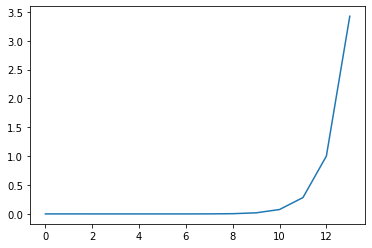

In [33]:
plt.plot(G_out)

In [110]:
P  = cal.Substance("P(aq)", state="aq", H0=0, S0=0, cP=0, molarMass=100.0, density=1.0)
D  = cal.Substance("D(aq)", state="aq", H0=0, S0=0, cP=0, molarMass=100.0, density=1.0)
PD = cal.Substance("PD(aq)", state="aq", H0=0, S0=50.0, cP=0, molarMass=100.0, density=1.0)

chemicals = {0: P, 1: D, 2: PD}
rxns = [{0: -1, 1: -1, 2: 1}]

s0 = cal.State3(T=298.15, chemicals=chemicals, rxns=rxns, V=1.0)

s0.set_state({0: 1.0, 1: 1.0, 2: 0.0})

A, b = cal.arrayRxns(s0.state, s0.rxns)

In [111]:
dx = np.linspace(0.01, 0.99, 99).reshape(-1, 1)

In [112]:
vals = (A @ dx.T + b.reshape(-1, 1)).T

In [113]:
Gbar_all = np.array([s0.get_prop_conc('Gbar', val) for val in vals])

In [114]:
dG = sum(s0.get_prop_conc('G0bar'))

In [133]:
Gibbs = [s0.G(x=val) for val in vals]

In [123]:
Gout = np.einsum('s,sv', A.flatten(), Gbar_all.T)

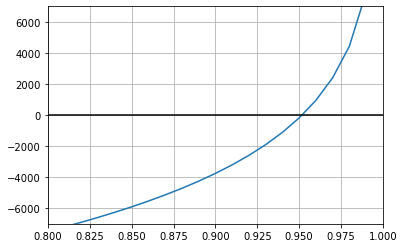

In [131]:
plt.plot(dx, Gout)
plt.xlim(0.8, 1)
plt.axhline(color='0')
plt.ylim(-7000, 7000)
plt.grid()

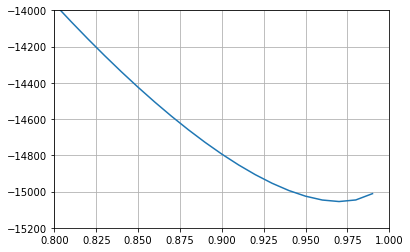

In [139]:
plt.plot(dx, Gibbs)
plt.xlim(0.8, 1)
plt.axhline(color='0')
plt.ylim(-15200, -14000)
plt.grid()